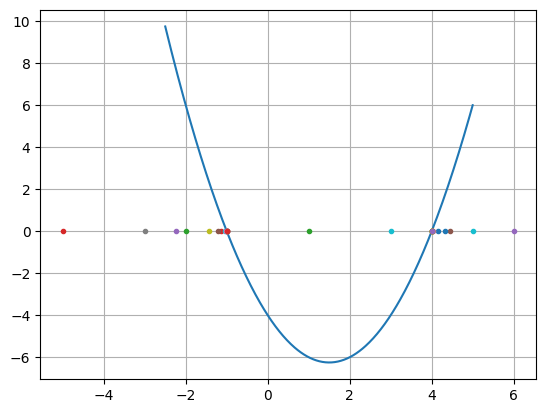

In [5]:
import numpy as np  
import matplotlib.pyplot as plt

# Test function and plots
def newton(f, df, x_0, tol):
    x = x_0
    
    approx = []
    
    while np.abs(f(x)) > tol:
        f_x = f(x)
        df_x = df(x)
        
        approx.append(x)
        
        if df_x == 0 or np.abs(df_x)<tol:
            raise Exception("The second derivative is zero at the point, so cannot execute Newton's Method.")
            
        x_new = x - f_x/df_x
        
        x = x_new
        
    return x, approx

def f(x):
    return x**2 - 3*x - 4

def df(x):
    return 2*x - 3

x_1= np.linspace(-2.5, 5, 400)
plt.plot(x_1, f(x_1))
plt.grid(True)

def basincollector(initial):
    initial = initial
    
    root = []
    approx = []
    
    for i in range(len(initial)):
        root, approx = newton(f, df, initial[i], 1e-5)
        
        plt.plot(root, 0, ".")
        
        for j in range(len(approx)):
            plt.plot(approx[j], 0, ".")
        
    plt.show()
        

    
initial_guess = [-2, -3, 1, 5, 6, 3, -1, 4]
#initial_guess = np.arange(-5, 5, 1)

collect = basincollector(initial_guess)

collect


In [6]:
def f_real(x):
    return np.sin(x)

def df_real(x):
    return np.cos(x)

print(newton(f_real, df_real, -9, 1e-5))

(-9.424770997816912, [-9, -9.45231565944181])


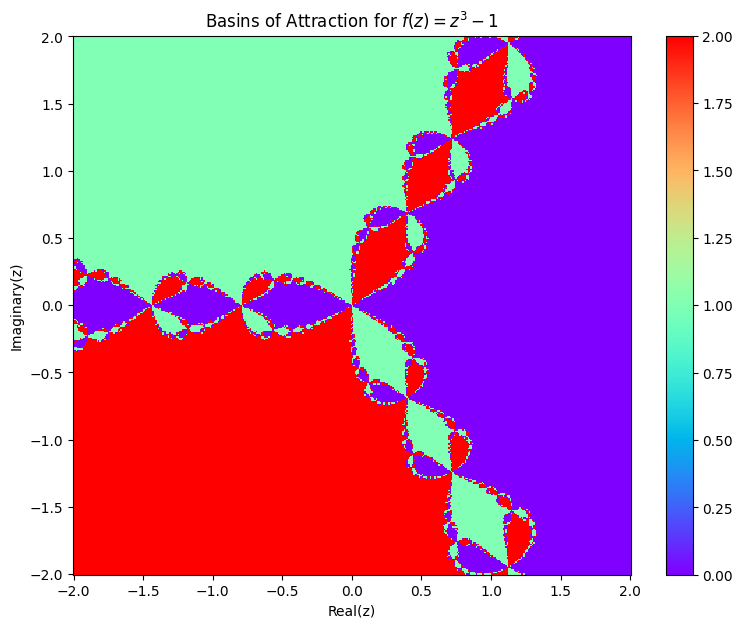

In [9]:
def newton(f, df, x_0, tol):
    x = x_0
    
    while np.abs(f(x)) > tol:
        f_x = f(x)
        df_x = df(x)
        
        if df_x == 0 or np.abs(df_x)<tol:
            raise Exception("The second derivative is zero at the point, so cannot execute Newton's Method.")
            
        x_new = x - f_x/df_x
        
        x = x_new
        
    return x


def f_complex(z):
    return z**3 - 1

def df_complex(z):
    return 3*z**2


# Set up the grid of complex numbers
x = np.linspace(-2, 2, 400) # for real numbers
y = np.linspace(-2, 2, 400) # for imaginary numbers
X, Y = np.meshgrid(x, y)
Z = X + 1j*Y # complex numbers


# Initialize an array to store the results
roots = np.zeros(Z.shape, dtype=complex)

for i in range(len(x)): # real numbers of z
    for j in range(len(y)): # imaginary numbers of z
        root = newton(f_complex, df_complex, Z[i, j], 1e-6) # apply Newton's method to each point in the grid
        if root is None:
            roots[i, j] = np.nan  # Assign NaN to points where the method fails to converge

        else:
            roots[i, j] = root
            


# Known roots of z^3 - 1
known_roots = [1, (-1 + np.sqrt(3) * 1j)/2, (-1 - np.sqrt(3) * 1j)/2]


# Map each point to the index of its closest root in the known_roots array
root_indices = np.zeros(Z.shape, dtype=int)

for idx, root in enumerate(known_roots): # add index of the root to each iteration 
    check = np.isclose(roots, root, atol=1e-6) # check if the element in roots is close to that in know_roots array, absolute tolerance of 1e-6
    root_indices[check] = idx

# Plot
plt.figure(figsize = (9,7))
c = plt.pcolormesh(X, Y, root_indices, cmap = 'rainbow')
plt.colorbar(c)
plt.title('Basins of Attraction for $f(z) = z^3 - 1$')
plt.xlabel('Real(z)')
plt.ylabel('Imaginary(z)')
plt.show()

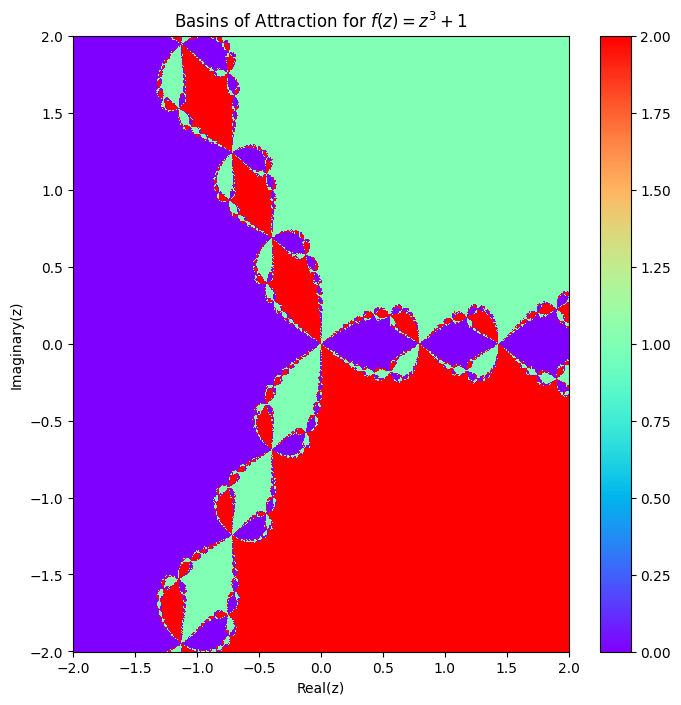

In [10]:
def f_complex(z):
    return z**3 + 1 

def df_complex(z):
    return 3*z**2


# Set up the grid of complex numbers
x = np.linspace(-2, 2, 800)
y = np.linspace(-2, 2, 800)
X, Y = np.meshgrid(x, y)
Z = X + 1j*Y


# Initialize an array to store the results
roots = np.zeros(Z.shape, dtype=complex)

for i in range(len(x)): # real numbers of z
    for j in range(len(y)): # imaginary numbers of z
        root = newton(f_complex, df_complex, Z[i, j], 1e-6) # apply Newton's method to each point in the grid
        if root is None:
            roots[i, j] = np.nan  # Assign NaN to points where the method fails to converge

        else:
            roots[i, j] = root
            


# Known roots of z^2 + 1
known_roots = [-1, (1 + np.sqrt(3) * 1j)/2, (1 - np.sqrt(3) * 1j)/2]


# Map each point to the index of its closest root in the known_roots array
root_indices = np.zeros(Z.shape, dtype=int)

for idx, root in enumerate(known_roots): # add index of the root to each iteration 
    check = np.isclose(roots, root, atol=1e-6) # check if the element in roots is close to that in know_roots array, absolute tolerance of 1e-6
    root_indices[check] = idx

# Plot
plt.figure(figsize=(8, 8))
c = plt.pcolormesh(X, Y, root_indices, cmap = 'rainbow')
plt.colorbar(c)
plt.title('Basins of Attraction for $f(z) = z^3 + 1$')
plt.xlabel('Real(z)')
plt.ylabel('Imaginary(z)')
plt.show()


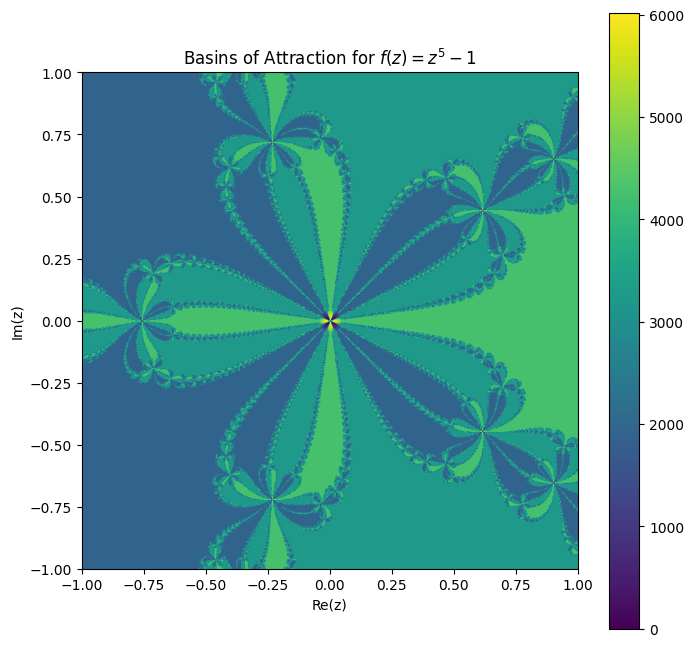

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
def f(z):
    return z**5 - 1

def df(z):
    return 5*z**4

# Newton-Raphson method
def newton_raphson(root, max_iter=50, tol=1e-6):
    for i in range(max_iter):
        step = f(root) / df(root)
        root -= step
        if abs(step) < tol:
            return root
    return root

# Set up the grid in the complex plane
resolution = 800
x = np.linspace(-1, 1, resolution)
y = np.linspace(-1, 1, resolution)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Initialize the array for the roots
roots = np.zeros(Z.shape, dtype=complex)

# Perform the iteration
for i in range(len(x)):
    for j in range(len(y)):
        roots[i, j] = newton_raphson(Z[i, j])

# Get unique roots and assign colors
unique_roots = np.unique(roots.round(decimals=6))
root_colors = {root: i for i, root in enumerate(unique_roots)}
colors = np.array([[root_colors[root] for root in row] for row in roots.round(decimals=6)])

# Plot the basins of attraction
plt.figure(figsize=(8, 8))
plt.imshow(colors, extent=(-1, 1, -1, 1), origin='lower')
plt.colorbar()
plt.title('Basins of Attraction for $f(z) = z^5 - 1$')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.show()
